# Example Four: Housing Price Preditction

***In the example, I will be demonstrating a regression problem using multiple models, and with visualization tools such as matplotlib/seaborn, data preprocessing with be taken care of by combining both pandas's DataFrame manipulation and sklearn's built-in column transformer***

In [28]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import missingno
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin

## Data Visualization and Exploration

In [2]:
# getting overview of the data
df = pd.read_csv('housing.csv')
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# locate the column where there are null values
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df_viz = df.iloc[:, 0:-1]
df_viz

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


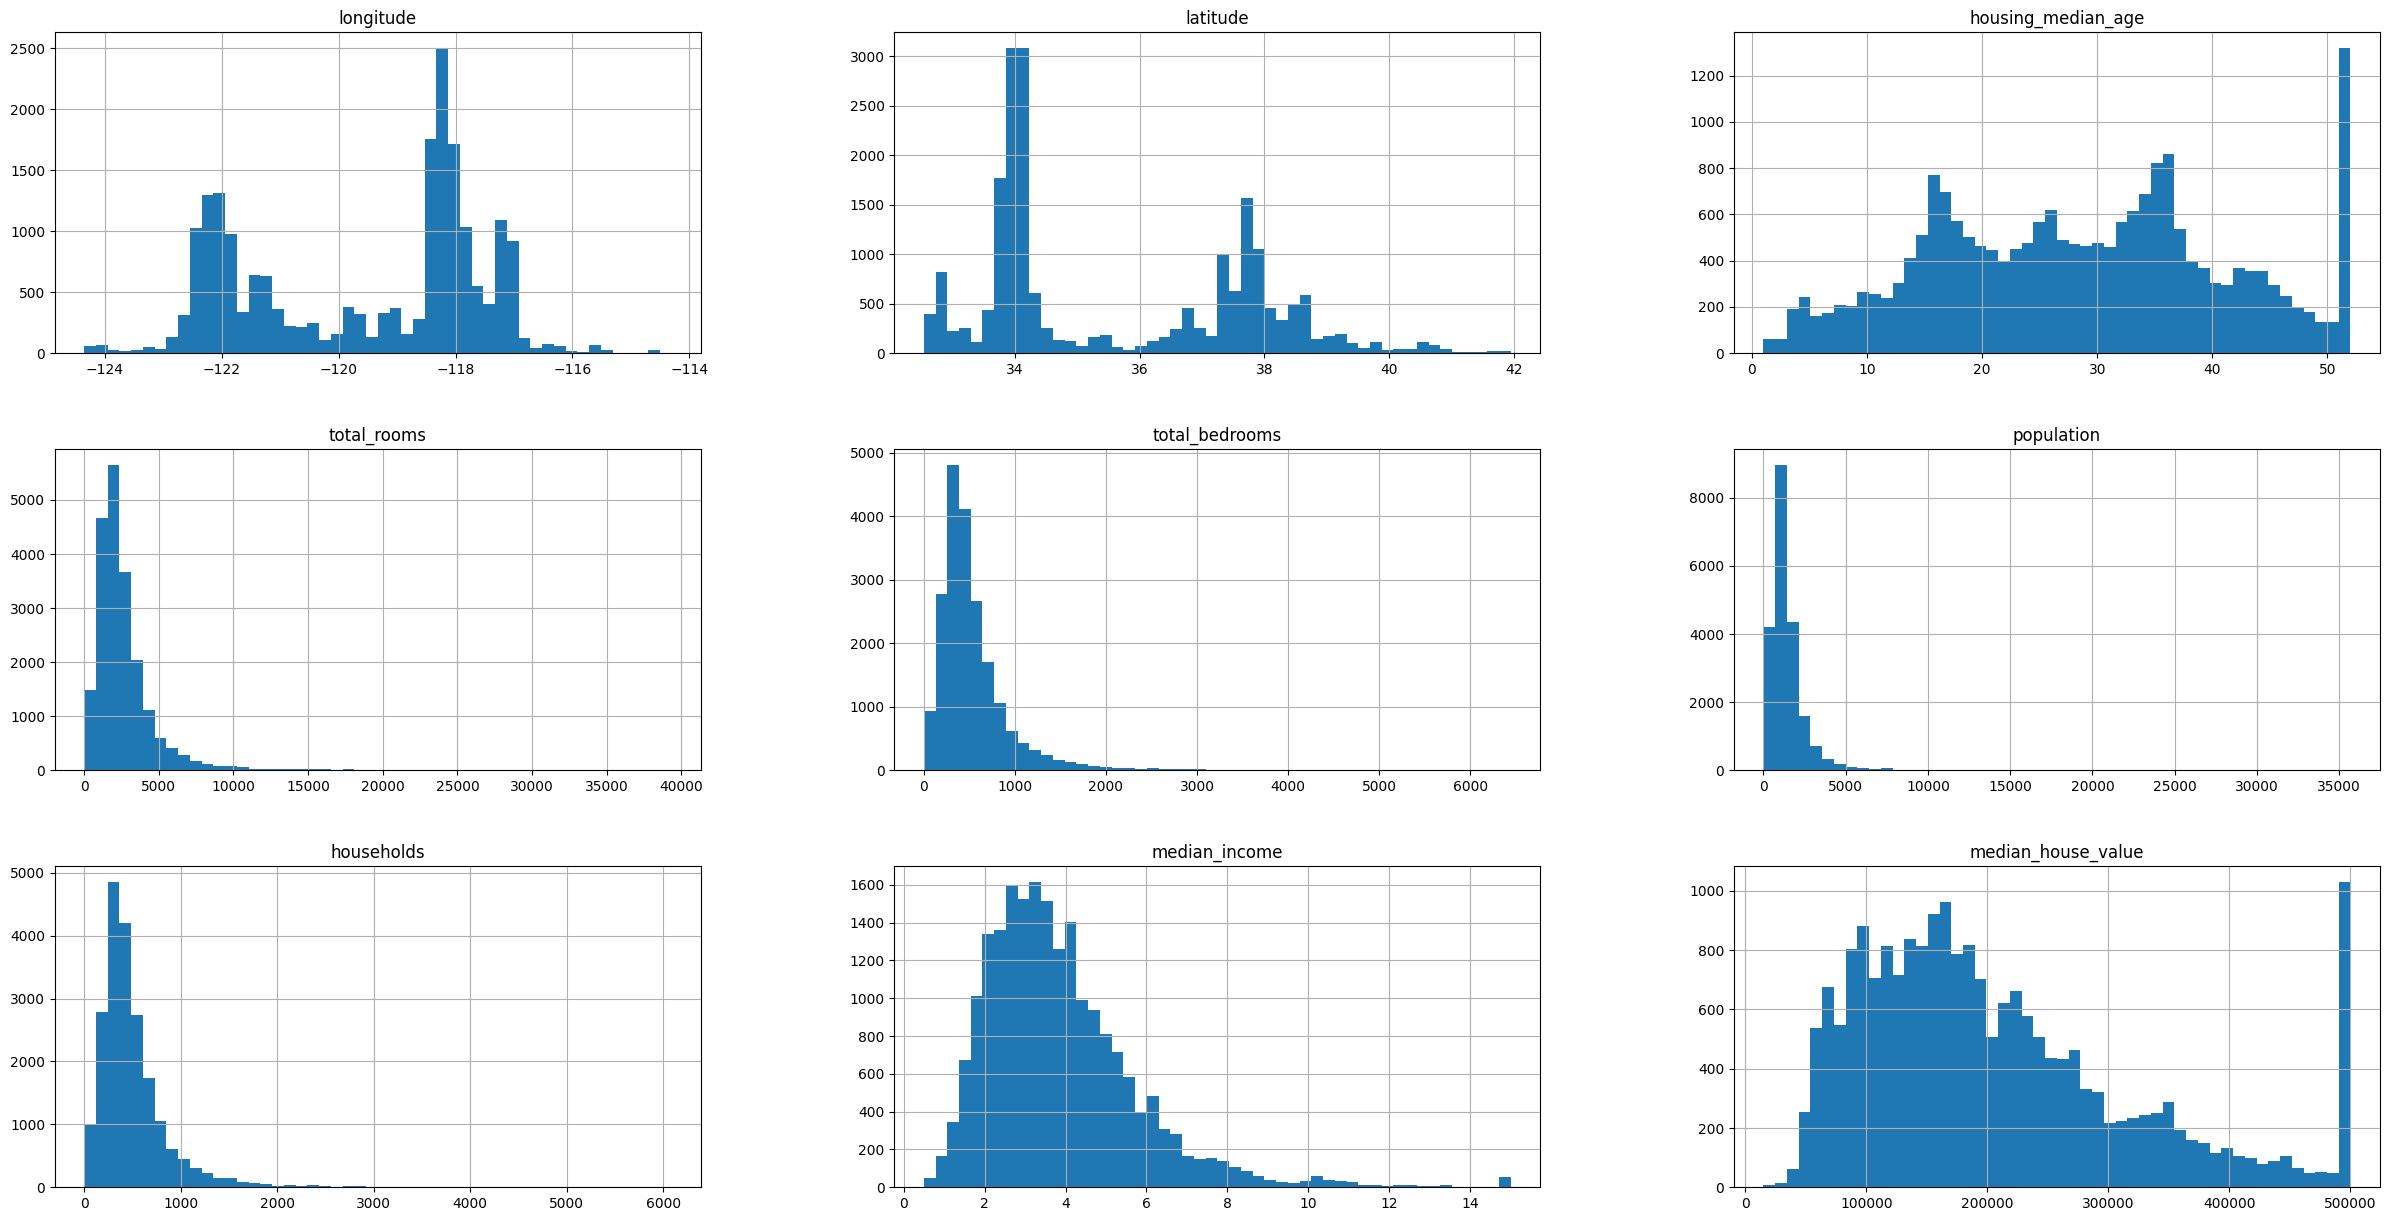

In [6]:
df_viz.hist(bins=50, figsize=(30,15))
plt.show()

***Note that here we can already notice that frequency wise, median income and median housing value has a rather similar trend, where both are somewhat grouped in the middle of the histograph.***

In [7]:
df_viz.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

***This validated the hypothesis of the possibility that income and house value might have a strong correlation***

/var/folders/t7/wb5zytnj22v3_zzj00hxr7980000gn/T/ipykernel_90425/2408524336.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + df_viz.columns.tolist(), rotation=90)
/var/folders/t7/wb5zytnj22v3_zzj00hxr7980000gn/T/ipykernel_90425/2408524336.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + df_viz.columns.tolist())


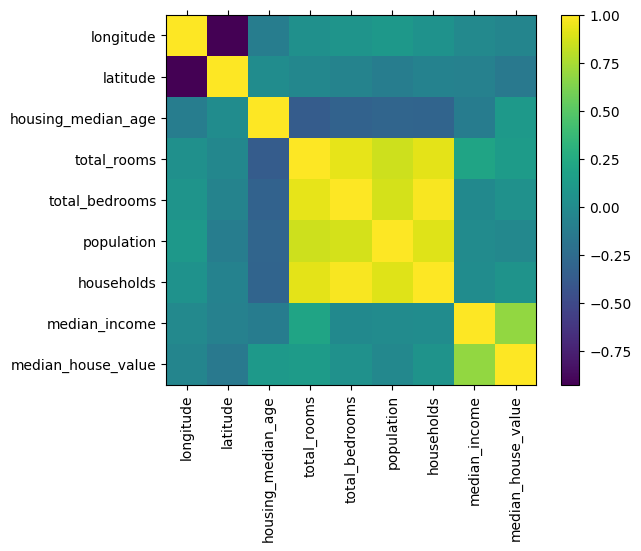

In [8]:
corr_matrix = df_viz.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df_viz.corr(), interpolation=None)
fig.colorbar(cax)
ax.tick_params(axis="x", labelbottom=True, labeltop=False)
ax.set_xticklabels([''] + df_viz.columns.tolist(), rotation=90)
ax.set_yticklabels([''] + df_viz.columns.tolist())
plt.show()

***The warning here indicates that my matplotlib needs to be downgraded. So let's ignore this for now***

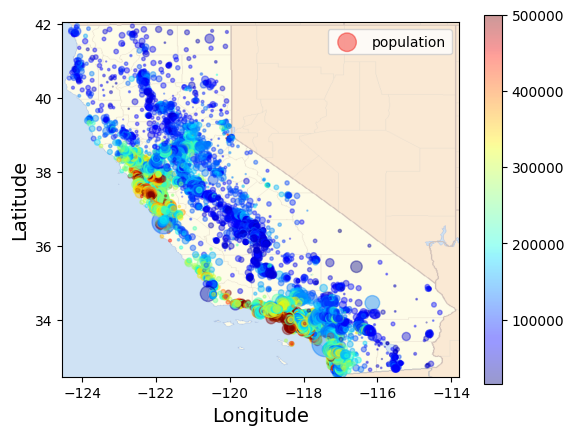

In [9]:
# visualizing the heat map and combine it into the actual map of california
california_img=mpimg.imread('california.png')
df_viz.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=df_viz['population']/100, c=df_viz['median_house_value'], cmap=plt.get_cmap("jet"), 
            colorbar=True, sharex=False, label='population')
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend()
plt.show()

## Data Preprocessing

In [10]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Experimenting with Data

In [11]:
for i in range(2, 6):
    print(pd.cut(df['housing_median_age'], bins=i).value_counts())

(26.5, 52.0]     11391
(0.949, 26.5]     9249
Name: housing_median_age, dtype: int64
(18.0, 35.0]     8970
(35.0, 52.0]     6344
(0.949, 18.0]    5326
Name: housing_median_age, dtype: int64
(26.5, 39.25]     7209
(13.75, 26.5]     6886
(39.25, 52.0]     4182
(0.949, 13.75]    2363
Name: housing_median_age, dtype: int64
(31.6, 41.8]     5455
(11.2, 21.4]     4916
(21.4, 31.6]     4864
(41.8, 52.0]     3582
(0.949, 11.2]    1823
Name: housing_median_age, dtype: int64


***Concludable from here that if we were to cut the housing median age into three groups, the best quantile would be three***

In [12]:
df_exp1 = df.copy()
df_exp1['beds_per_room'] = df_exp1['total_bedrooms'] / df_exp1['total_rooms']
df_exp1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,beds_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.172096


In [13]:
df_exp1['population_per_household'] = df_exp1['population'] / df_exp1['households']
df_exp1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,beds_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1243.333333


***One thing to notice here is that the standard deviation for pop_per_house is quite high***

### Data Preparation

In [14]:
df_exp = df.copy()
x = df_exp.drop('median_house_value', axis=1)
y = df.pop('median_house_value')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [15]:
# create an option to use later on to add either of the two columns described below
class Add_extra(BaseEstimator, TransformerMixin):
    def __init__(self): 
        return
    def fit(self, X, y=None):
        return self  
    def transform(self, X):
        X1 = X.copy()
        X1['population_per_household'] = X1['population'] / X1['households']
        X1['beds_per_room'] = X1['total_bedrooms'] / X1['total_rooms']
        return X1

In [16]:
# make column transformer before making pipelines
simp = SimpleImputer(strategy='median')
ohe = OneHotEncoder(handle_unknown='ignore')
col_trans = make_column_transformer((simp, ['total_bedrooms', 'beds_per_room']),
                                   (ohe, ['ocean_proximity']), remainder='passthrough')

## Model Previewing

### Linear Regression

In [140]:
# make pipeline for linreg
linreg_pre = LinearRegression()
pipe_linreg_pre = make_pipeline(Add_extra(), col_trans, linreg_pre)
pipe_linreg_pre.fit(x_train, y_train)
y_pred_linreg_pre = pipe_linreg_pre.predict(x_test)
print(f'Metrics RMSE: {metrics.mean_squared_error(y_test, y_pred_linreg_pre, squared=False)}')
print(f'Cross Validation RMSE: {np.sqrt(-cross_val_score(pipe_linreg_pre, x, y, cv=5, scoring="neg_mean_squared_error"))}')

Metrics RMSE: 68762.42247211635
Cross Validation RMSE: [72057.62231448 74441.19744314 75434.34593185 75829.87783844
 66416.81253001]


### Decision Tree Regressor

In [18]:
# make pipeline for dtr
dtr_pre = DecisionTreeRegressor()
pipe_dtr_pre = make_pipeline(Add_extra(), col_trans, dtr_pre)
pipe_dtr_pre.fit(x_train, y_train)
y_pred_dtr_pre = pipe_dtr_pre.predict(x_test)
print(f'Metrics RMSE: {metrics.mean_squared_error(y_test, y_pred_dtr_pre, squared=False)}')
print(f'Cross Validation RMSE: {np.sqrt(-cross_val_score(pipe_dtr_pre, x, y, cv=5, scoring="neg_mean_squared_error"))}')

Metrics RMSE: 69747.6912339846
Cross Validation RMSE: [102750.08107116  87627.5839889   84460.66718756 111400.15046411
  81370.25864771]


### SVR

In [19]:
# make pipeline for SVR
svr_pre = SVR()
pipe_svr_pre = make_pipeline(Add_extra(), col_trans, svr_pre)
pipe_svr_pre.fit(x_train, y_train)
y_pred_svr_pre = pipe_svr_pre.predict(x_test)
print(f'Metrics RMSE: {metrics.mean_squared_error(y_test, y_pred_svr_pre, squared=False)}')
print(f'Cross Validation RMSE: {np.sqrt(-cross_val_score(pipe_svr_pre, x, y, cv=5, scoring="neg_mean_squared_error", n_jobs=-1))}')

Metrics RMSE: 118497.82479965467
Cross Validation RMSE: [105204.31953364 116280.29852688 135903.19327894 108353.08353446
 131472.91830382]


### Random Forest Regressor

In [29]:
# make pipeline for rfr
rfr_pre = RandomForestRegressor()
pipe_rfr_pre = make_pipeline(Add_extra(), col_trans, rfr_pre)
pipe_rfr_pre.fit(x_train, y_train)
y_pred_rfr_pre = pipe_rfr_pre.predict(x_test)
print(f'Metrics RMSE: {metrics.mean_squared_error(y_test, y_pred_rfr_pre, squared=False)}')
print(f'Cross Validation RMSE: {np.sqrt(-cross_val_score(pipe_rfr_pre, x, y, cv=5, scoring="neg_mean_squared_error", n_jobs=-1))}')

Metrics RMSE: 51039.532372624126
Cross Validation RMSE: [77135.46164975 64012.64448723 61694.60261326 84521.86333103
 62065.24561442]


## Hyperparameter Tuning

### Linear Regression

In [20]:
params_linreg = {}
params_linreg['linearregression__fit_intercept'] = [True, False]
grid_linreg = GridSearchCV(pipe_linreg_pre, params_linreg, cv=5, scoring='neg_mean_squared_error')
grid_linreg.fit(x, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('add_extra', Add_extra()),
                                       ('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('simpleimputer',
                                                                         SimpleImputer(strategy='median'),
                                                                         ['total_bedrooms',
                                                                          'beds_per_room']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['ocean_proximity'])])),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [21]:
grid_linreg.best_params_

{'linearregression__fit_intercept': True}

### Decision Tree Regressor

In [22]:
params_dtr = {}
params_dtr['decisiontreeregressor__max_depth'] = [6, 7, 8, 9, 10, 11, 12, 13, 14]
params_dtr['decisiontreeregressor__min_samples_leaf'] = [16, 17, 18, 19, 20, 21, 22, 23, 24]
grid_dtr = GridSearchCV(pipe_dtr_pre, params_dtr, cv=5, scoring='neg_mean_squared_error')
grid_dtr.fit(x, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('add_extra', Add_extra()),
                                       ('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('simpleimputer',
                                                                         SimpleImputer(strategy='median'),
                                                                         ['total_bedrooms',
                                                                          'beds_per_room']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['ocean_proximity'])])),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__max_depth': [6, 7, 8, 9, 10,
                                                              11, 12, 13, 14],
                         'decisiontreeregressor__min_samples_leaf': [16, 17, 18,
                                                                     19, 20, 21,
                                                                     22, 23,
                                                                     24]},
             scoring='neg_mean_squared_error')

In [23]:
grid_dtr.best_params_

{'decisiontreeregressor__max_depth': 8,
 'decisiontreeregressor__min_samples_leaf': 20}

### SVR

In [26]:
params_svr = [{'svr__kernel': ['linear'], 'svr__C': [0.1, 1, 10, 100]}, {'svr__kernel': ['rbf'], 'svr__C': [1, 10, 100], 'svr__gamma': [0.01, 0.1, 0.2]}]
grid_svr = GridSearchCV(pipe_svr_pre, params_svr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_svr.fit(x, y)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV] END .....................svr__C=0.1, svr__kernel=linear; total time=  16.4s
[CV] END ......................svr__C=10, svr__kernel=linear; total time= 7.6min
[CV] END .........svr__C=1, svr__gamma=0.01, svr__kernel=rbf; total time=  12.1s
[CV] END .........svr__C=1, svr__gamma=0.01, svr__kernel=rbf; total time=  11.9s
[CV] END .........svr__C=1, svr__gamma=0.01, svr__kernel=rbf; total time=  11.4s
[CV] END ..........svr__C=1, svr__gamma=0.1, svr__kernel=rbf; total time=  11.6s
[CV] END ..........svr__C=1, svr__gamma=0.1, svr__kernel=rbf; total time=  11.8s
[CV] END ..........svr__C=1, svr__gamma=0.2, svr__kernel=rbf; total time=  12.0s
[CV] END ..........svr__C=1, svr__gamma=0.2, svr__kernel=rbf; total time=  10.2s
[CV] END ........svr__C=10, svr__gamma=0.01, svr__kernel=rbf; total time=  11.7s
[CV] END ........svr__C=10, svr__gamma=0.01, svr__kernel=rbf; total time=  11.3s
[CV] END .........svr__C=10, svr__gamma=0.1, svr

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('add_extra', Add_extra()),
                                       ('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('simpleimputer',
                                                                         SimpleImputer(strategy='median'),
                                                                         ['total_bedrooms',
                                                                          'beds_per_room']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['ocean_proximity'])])),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid=[{'svr__C': [0.1, 1, 10, 100],
                          'svr__kernel': ['linear']},
                         {'svr__C': [1, 10, 100],
                          'svr__gamma': [0.01, 0.1, 0.2],
                          'svr__kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [27]:
grid_svr.best_params_

{'svr__C': 100, 'svr__kernel': 'linear'}

### Random Forest Regressor

In [33]:
params_rfr = {}
params_rfr['randomforestregressor__n_estimators'] = [50, 100, 150]
params_rfr['randomforestregressor__min_samples_leaf'] = [10, 20, 30]
grid_rfr = GridSearchCV(pipe_rfr_pre, params_rfr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_rfr.fit(x, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('add_extra', Add_extra()),
                                       ('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('simpleimputer',
                                                                         SimpleImputer(strategy='median'),
                                                                         ['total_bedrooms',
                                                                          'beds_per_room']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['ocean_proximity'])])),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__min_samples_leaf': [10, 20,
                                                                     30],
                         'randomforestregressor__n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=2)

In [34]:
grid_rfr.best_params_

{'randomforestregressor__min_samples_leaf': 20,
 'randomforestregressor__n_estimators': 100}

## Model Selection

In [35]:
linreg = LinearRegression()
dtr = DecisionTreeRegressor(max_depth=8, min_samples_leaf=20)
svr = SVR(C=100, kernel='linear')
rfr = RandomForestRegressor(n_estimators=100, min_samples_leaf=20)
pipe_linreg = make_pipeline(Add_extra(), col_trans, linreg)
pipe_dtr = make_pipeline(Add_extra(), col_trans, dtr)
pipe_svr = make_pipeline(Add_extra(), col_trans, svr)
pipe_rfr = make_pipeline(Add_extra(), col_trans, rfr)
model_list = [pipe_linreg, pipe_dtr, pipe_svr, pipe_rfr]
final_rmse = []
for model in model_list:
    rmse = np.sqrt(-cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error').mean())
    final_rmse.append(rmse)
print(final_rmse)

[CV] END randomforestregressor__min_samples_leaf=1, randomforestregressor__n_estimators=50; total time=   6.6s
[CV] END randomforestregressor__min_samples_leaf=1, randomforestregressor__n_estimators=100; total time=  13.2s
[CV] END randomforestregressor__min_samples_leaf=5, randomforestregressor__n_estimators=50; total time=   5.3s
[CV] END randomforestregressor__min_samples_leaf=5, randomforestregressor__n_estimators=100; total time=  10.4s
[CV] END randomforestregressor__min_samples_leaf=5, randomforestregressor__n_estimators=150; total time=  15.6s
[CV] END randomforestregressor__min_samples_leaf=10, randomforestregressor__n_estimators=150; total time=  12.4s
[CV] END randomforestregressor__min_samples_leaf=10, randomforestregressor__n_estimators=50; total time=   4.7s
[CV] END randomforestregressor__min_samples_leaf=10, randomforestregressor__n_estimators=150; total time=  14.2s
[CV] END randomforestregressor__min_samples_leaf=20, randomforestregressor__n_estimators=100; total time

[CV] END randomforestregressor__min_samples_leaf=1, randomforestregressor__n_estimators=100; total time=  13.1s
[CV] END randomforestregressor__min_samples_leaf=1, randomforestregressor__n_estimators=150; total time=  19.6s
[CV] END randomforestregressor__min_samples_leaf=5, randomforestregressor__n_estimators=150; total time=  16.0s
[CV] END randomforestregressor__min_samples_leaf=10, randomforestregressor__n_estimators=100; total time=   9.2s
[CV] END randomforestregressor__min_samples_leaf=10, randomforestregressor__n_estimators=100; total time=   9.5s
[CV] END randomforestregressor__min_samples_leaf=20, randomforestregressor__n_estimators=50; total time=   4.0s
[CV] END randomforestregressor__min_samples_leaf=20, randomforestregressor__n_estimators=50; total time=   4.1s
[CV] END randomforestregressor__min_samples_leaf=20, randomforestregressor__n_estimators=50; total time=   4.3s
[CV] END randomforestregressor__min_samples_leaf=20, randomforestregressor__n_estimators=150; total ti

In [142]:
model_list_pre = [pipe_linreg_pre, pipe_dtr_pre, pipe_svr_pre, pipe_rfr_pre]
before_rmse = []
for model_before in model_list_pre:
    rmse_before = np.sqrt(-cross_val_score(model_before, x, y, cv=5, scoring='neg_mean_squared_error').mean())
    before_rmse.append(rmse_before)
print(before_rmse)

[72918.44309389731, 96888.93376856763, 120070.19078538772, 70200.9390666566]


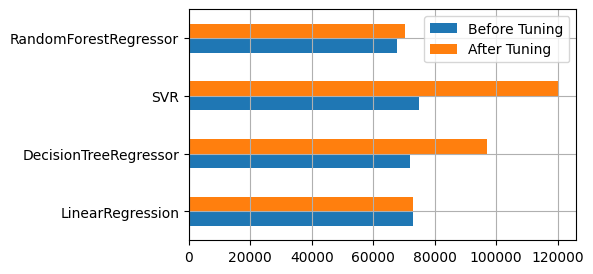

In [162]:
rmse_dict = {'LinearRegression': [final_rmse[0], before_rmse[0]], 'DecisionTreeRegressor': [final_rmse[1], before_rmse[1]], 'SVR': [final_rmse[2], before_rmse[2]], 'RandomForestRegressor': [final_rmse[3], before_rmse[3]]}
df_result = pd.DataFrame.from_dict(data=rmse_dict, orient='index')
df_result.plot(kind='barh', grid=True, figsize=(5, 3))
plt.legend(['Before Tuning', 'After Tuning'])
plt.show()